# Car Price Prediction::

# Problem Statement::
<p> A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.</p>

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::
## 1.Load Data

In [146]:

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD

In [147]:
data = pd.read_csv("CarPrice_Assignment.csv")


data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [148]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## 2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

In [149]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [151]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['enginelocation'])
data['doornumber'] = labelencoder.fit_transform(data['doornumber'])

In [152]:

data['doornumber'] = data['doornumber'].map({'two':2,'four':4})

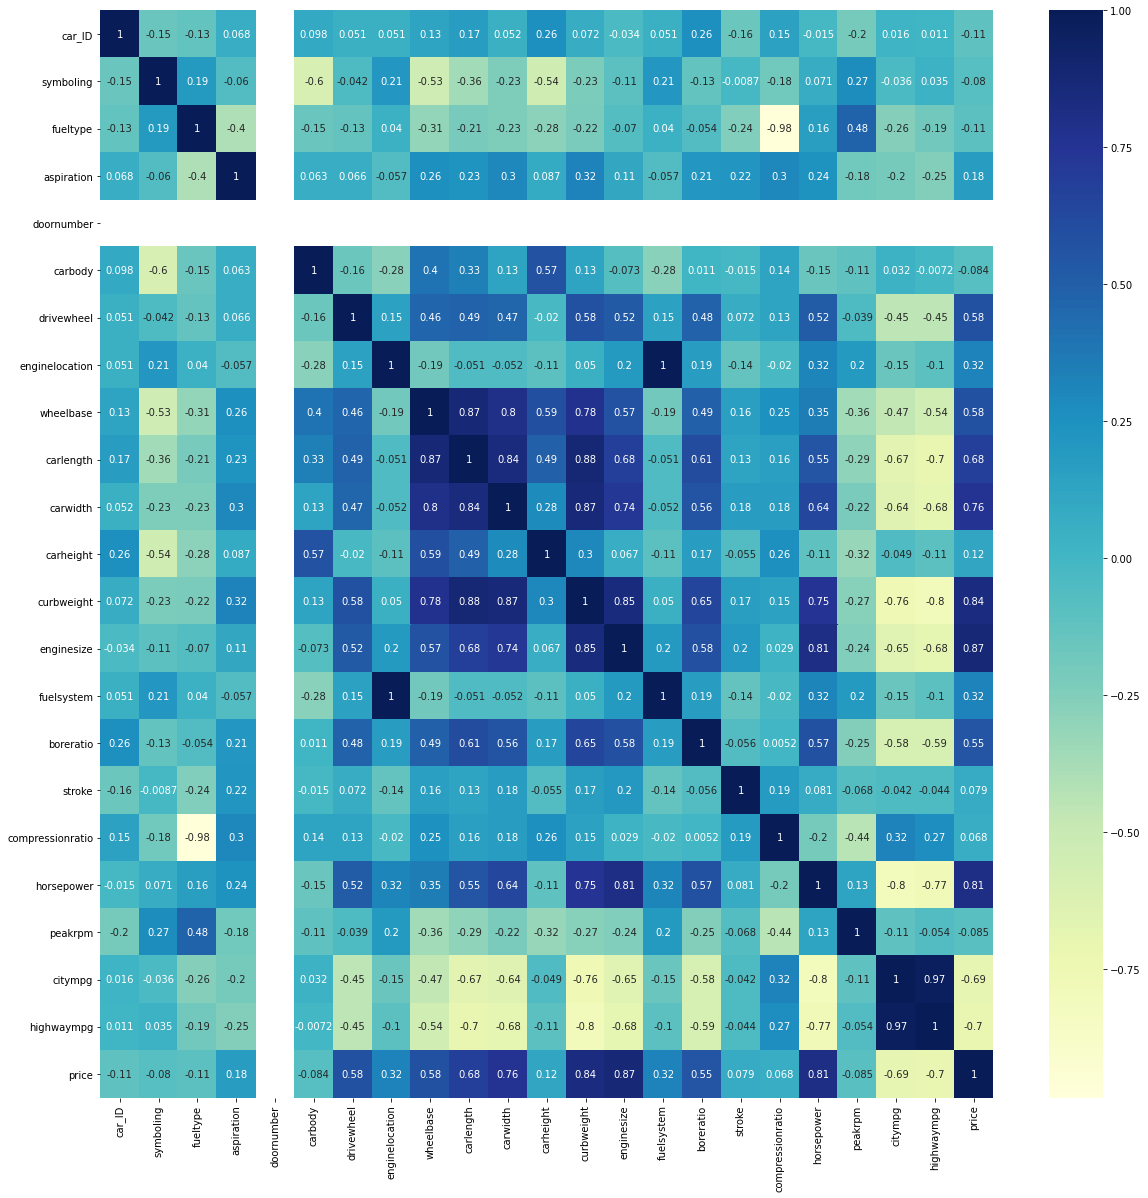

In [153]:
corrmatrix= data.corr()
top_corr_features = corrmatrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [154]:
data1 = data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
              'wheelbase','drivewheel','price','enginelocation']]

In [155]:
print(data1.shape)
data1.head()

(205, 10)


,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0


## 3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [156]:

x = (data1.loc[:, data1.columns != 'price'])
y = (data1.loc[:, data1.columns == 'price'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


In [157]:
mean = x_train.iloc[: , 0:14].mean(axis=0)
x_train.iloc[: , 0:14] -= mean
std = x_train.iloc[:, 0:14].std(axis=0)
x_train.iloc[: , 0:14] /= std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [158]:
val_mean = x_train.iloc[:, 0:14].mean(axis=0)
val_std = x_train.iloc[:, 0:14].std(axis=0)
x_train.iloc[:, 0:14] -= val_mean
x_train.iloc[:, 0:14] /= val_std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [159]:

# x_train = np.asarray(data1).astype('float32')
# y_train = np.asarray(data1).astype('float32')

## Create model::

In [160]:
def build_model():
    model = Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1,))
    return model

In [161]:
model=build_model()

In [162]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [163]:
model.fit(x_train, y_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 229488765.3333 - mae: 13179.7399
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 228099901.3333 - mae: 13211.0640
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 242868888.0000 - mae: 13359.8167
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 224272704.0000 - mae: 12898.4302
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 245136418.6667 - mae: 13424.9176
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 257512554.6667 - mae: 13821.0387
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 225301936.0000 - mae: 12957.8644
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 231830360.0000 - mae: 13055.6270
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 241752154.6667 - mae: 13483.1367
Epoch 10/100
5/5 [==============================] - 0s 2ms/step 

In [164]:

model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 137755664.0000 - mae: 11369.8203


[137755664.0, 11369.8203125]

In [165]:
# predicting the test set results
y_pred = model.predict(x_test)

In [166]:
y_pred

array([[30398.898],
       [28160.541],
       [21845.443],
       [24786.307],
       [33824.38 ],
       [19286.969],
       [21194.467],
       [20173.88 ],
       [22897.947],
       [21020.963],
       [24884.715],
       [20675.246],
       [25056.1  ],
       [22745.926],
       [36606.4  ],
       [19051.256],
       [14476.989],
       [26504.79 ],
       [22566.754],
       [22012.848],
       [22648.197],
       [28845.209],
       [19114.006],
       [16542.154],
       [18854.707],
       [31586.06 ],
       [24007.934],
       [27904.049],
       [19392.209],
       [26976.123],
       [32036.979],
       [18687.377],
       [21222.83 ],
       [28177.225],
       [20340.898],
       [31831.568],
       [23417.578],
       [22041.354],
       [18254.566],
       [27212.229],
       [21557.314],
       [24892.383],
       [27935.91 ],
       [21154.805],
       [18851.03 ],
       [21536.287],
       [18687.377],
       [20035.025],
       [29532.275],
       [26337.627],
